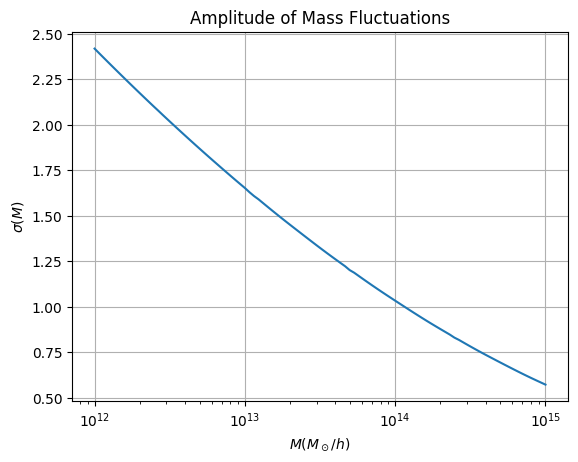

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import spherical_jn

# Define cosmological parameters
Omega_M = 0.308   # Matter density parameter
h = 0.6774        # Hubble constant (H0 = 100 h km/s/Mpc)
n_s = 0.9667      # Spectral index
A_s = 2.1e-9      # Amplitude of the primordial power spectrum
k_pivot = 0.05    # Pivot scale in Mpc^-1

# Critical density
rho_crit = 2.775e11  # h^2 M_sun / Mpc^3
rho_m = Omega_M * rho_crit  # Matter density

# Define wavenumber array
k = np.logspace(-2.0, 1.0, 500)

# Shape parameter
Gamma = Omega_M * h

# BBKS Transfer function
def T_BBKS(k, Gamma):
    q = k / Gamma
    L0 = np.log(1 + 2.34 * q) / (2.34 * q)
    C0 = 1 + 3.89 * q + (16.1 * q)**2 + (5.46 * q)**3 + (6.71 * q)**4
    return L0 * C0**-0.25

# Dimensionless power spectrum
def Delta2_k(k, A_s, n_s, k_pivot, H0, Gamma):
    T_k = T_BBKS(k, Gamma)
    return A_s * (k / k_pivot)**(n_s - 1) * (k / H0)**4 * T_k**2

# Calculate the dimensionless power spectrum
Delta2 = Delta2_k(k, A_s, n_s, k_pivot, 100 * h, Gamma)

# Function to calculate sigma^2(R)
def sigma2_R(R, k, Delta2):
    integrand = lambda lnk: Delta2_k(np.exp(lnk), A_s, n_s, k_pivot, 100 * h, Gamma) * (3 * spherical_jn(1, np.exp(lnk) * R) / (np.exp(lnk) * R))**2 
    return quad(integrand, np.log(k[0]), np.log(k[-1]))[0]

# Mass range and corresponding radius
M = np.logspace(12, 15, 100)  # in M_sun / h
R = (3 * M / (4 * np.pi * rho_m))**(1/3)

# Calculate sigma(R) for each R
sigma_R = np.sqrt([sigma2_R(r, k, Delta2) for r in R]) * 10**11/3.069

# Plot sigma(M)
plt.figure()
plt.plot(M, sigma_R)
plt.xscale('log')
plt.yscale('linear')
plt.xlabel(r'$M (M_\odot / h)$')
plt.ylabel(r'$\sigma(M)$')
plt.title('Amplitude of Mass Fluctuations')
plt.grid(True)
plt.show()
